# Spotify Top 50 Songs analysis

For this work we will use Top 50 Spotify Tracks 2020 dataset downloaded from here: https://www.kaggle.com/atillacolak/top-50-spotify-tracks-2020 . The aim of this analysis is to answer the given questions to show what parameters are needed to create a popular song.
The objective is to practice performing basic EDA, practice reading data, performing queries and filtering data using Pandas.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('spotifytoptracks.csv')
df.head()

,Unnamed: 0,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


## Data Cleaning

* Given dataset has unnecessary column 'Unnamed:0', that I will delete.
Also, for better readability I will convert the Duration of the Songs From Milliseconds to Seconds in the column 
'duration_ms' and will change in into new column 'duration_s'

In [5]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)   
df['duration_s'] = df['duration_ms'].apply(lambda x: round(x/1000, 2))
df.drop('duration_ms', axis=1, inplace=True)                      

* Checking if any values are missing;
* Checking if there are duplicates and remove all, leaving just the first occurance.

In [9]:
df.isna().sum()

artist              0
album               0
track_name          0
track_id            0
energy              0
danceability        0
key                 0
loudness            0
acousticness        0
speechiness         0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
duration_s          0
dtype: int64

In [10]:
df.drop_duplicates(keep='first')

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,genre,duration_s
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.3340,171.005,R&B/Soul,200.04
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.5400,98.078,Alternative/Indie,209.75
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.6420,116.971,Hip-Hop/Rap,196.65
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.8940,121.962,Dance/Electronic,176.22
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.6790,123.950,Nu-disco,183.29
5,DaBaby,BLAME IT ON BABY,ROCKSTAR (feat. Roddy Ricch),7ytR5pFWmSjzHJIeQkgog4,0.690,0.746,11,-7.956,0.24700,0.1640,0.000000,0.1010,0.4970,89.977,Hip-Hop/Rap,181.73
6,Harry Styles,Fine Line,Watermelon Sugar,6UelLqGlWMcVH1E5c4H7lY,0.816,0.548,0,-4.209,0.12200,0.0465,0.000000,0.3350,0.5570,95.390,Pop,174.00
7,Powfu,death bed (coffee for your head),death bed (coffee for your head),7eJMfftS33KTjuF7lTsMCx,0.431,0.726,8,-8.765,0.73100,0.1350,0.000000,0.6960,0.3480,144.026,Hip-Hop/Rap,173.33
8,Trevor Daniel,Nicotine,Falling,2rRJrJEo19S2J82BDsQ3F7,0.430,0.784,10,-8.756,0.12300,0.0364,0.000000,0.0887,0.2360,127.087,R&B/Hip-Hop alternative,159.38
9,Lewis Capaldi,Divinely Uninspired To A Hellish Extent,Someone You Loved,7qEHsqek33rTcFNT9PFqLf,0.405,0.501,1,-5.679,0.75100,0.0319,0.000000,0.1050,0.4460,109.891,Alternative/Indie,182.16


### Conlusions about dataset:
The dataset has been changed: dropped unnecessary columns, changed song length from milliseconds to seconds, also, further investigation showed no missing values and no duplicated entries.

## Exploratory Data Analysis (EDA)

* Check the overall information about our dataset;
* Check the dataframe size
* checking if indexes and columns are unique

In [11]:
df.shape

(50, 16)

In [12]:
df.index.is_unique

True

In [13]:
df.columns.is_unique

True

* Get the overall description of dataset

In [14]:
df.describe()

,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_s
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.609300,0.716720,5.720000,-6.225900,0.256206,0.124158,0.015962,0.196552,0.555710,119.690460,199.956000
std,0.154348,0.124975,3.709007,2.349744,0.265250,0.116836,0.094312,0.176610,0.216386,25.414778,33.996305
min,0.225000,0.351000,0.000000,-14.454000,0.001460,0.029000,0.000000,0.057400,0.060500,75.801000,140.530000
25%,0.494000,0.672500,2.000000,-7.552500,0.052800,0.048325,0.000000,0.093950,0.434000,99.557250,175.845000
50%,0.597000,0.746000,6.500000,-5.991500,0.188500,0.070050,0.000000,0.111000,0.560000,116.969000,197.850000
75%,0.729750,0.794500,8.750000,-4.285500,0.298750,0.155500,0.000020,0.271250,0.726250,132.317000,215.067500
max,0.855000,0.935000,11.000000,-3.280000,0.934000,0.487000,0.657000,0.792000,0.925000,180.067000,312.820000


### Visual example of outliers in the database:


The purpose of this part is simply show a graphic of various columns and the visual points of outliers.
This shows that not all columns with numeric values have outliers ('energy', 'valence', 'tempo'). We will see it is true on our further calculations. 

<AxesSubplot:>

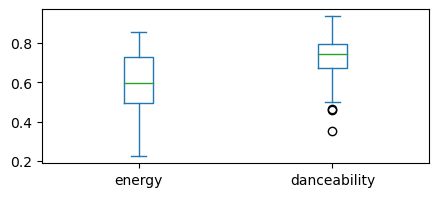

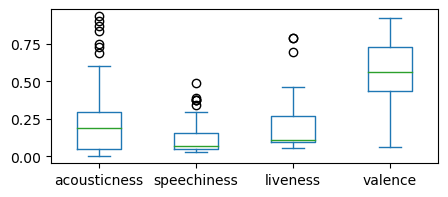

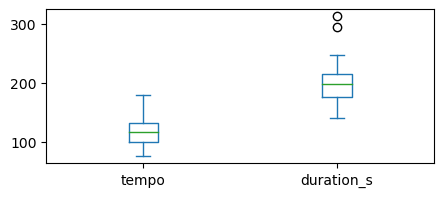

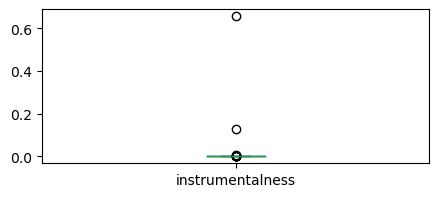

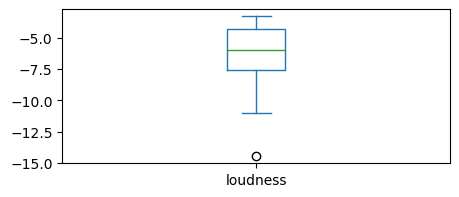

In [24]:
df.plot.box(grid=False, column=['energy', 'danceability'], figsize=(5, 2))
df.plot.box(grid=False, column=['acousticness', 'speechiness', 'liveness', 'valence'], figsize=(5, 2))
df.plot.box(grid=False, column=['tempo', 'duration_s'], figsize=(5, 2))
df.plot.box(grid=False, column=['instrumentalness'], figsize=(5, 2))
df.plot.box(grid=False, column=['loudness'], figsize=(5, 2))

#### Calculations to detect outliers:
<br>    
Calculating IQR (the interquartile range), also called the midspread or middle 50% is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.


* function to detect outliers, and their boundaries:<br>
Note: 1.5 (a constant used to discern outliers)

In [31]:
def detect_outliers(col):
    Q1 =col.quantile(0.25)
    Q3= col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR
    outliers = col[(col < lower_bound) | (col > upper_bound)]    
    return outliers
detect_outliers(df)

C:\Users\Gabija\AppData\Local\Temp\ipykernel_3876\2682133547.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = col[(col < lower_bound) | (col > upper_bound)]


,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,genre,duration_s
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000095,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.688,NaN,0.000161,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.790,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004320,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.731,NaN,NaN,0.696,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.751,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* apply detect_outliers function to every numeric column of dataset and sort it ascending order: <br>
Note: the columns without outliers were not printed out as the output is the empty list.

In [29]:
print(detect_outliers(df['danceability'].sort_values(ascending=True)))
print(detect_outliers(df['loudness'].sort_values(ascending=True)))
print(detect_outliers(df['acousticness'].sort_values(ascending=True)))
print(detect_outliers(df['speechiness'].sort_values(ascending=True)))
print(detect_outliers(df['instrumentalness'].sort_values(ascending=True)))
print(detect_outliers(df['liveness'].sort_values(ascending=True)))
print(detect_outliers(df['duration_s'].sort_values(ascending=True)))

44    0.351
16    0.459
47    0.464
Name: danceability, dtype: float64
24   -14.454
Name: loudness, dtype: float64
1     0.688
7     0.731
9     0.751
18    0.837
47    0.866
24    0.902
44    0.934
Name: acousticness, dtype: float64
29    0.342
27    0.375
26    0.375
43    0.379
38    0.389
19    0.487
Name: speechiness, dtype: float64
39    0.000064
0     0.000095
10    0.000134
1     0.000161
33    0.000209
48    0.000658
41    0.001090
34    0.001880
12    0.002440
3     0.004320
26    0.130000
24    0.657000
Name: instrumentalness, dtype: float64
7     0.696
2     0.790
41    0.792
Name: liveness, dtype: float64
43    295.18
49    312.82
Name: duration_s, dtype: float64


* Here just printing out the outliers information on the whole dataset for every column:<br>
total number of outliers;<br>
the maximum outlier value;<br>
the minimum outlier value.

In [30]:
print('number of outliers: ' + str(len(detect_outliers(df))))
print('max outlier value:' + str(detect_outliers(df).max()))
print('min outlier value:' + str(detect_outliers(df).min()))

number of outliers: 50
max outlier value:artist                None
album                 None
track_name            None
track_id              None
energy                 NaN
danceability         0.464
key                    NaN
loudness           -14.454
acousticness         0.934
speechiness          0.487
instrumentalness     0.657
liveness             0.792
valence                NaN
tempo                  NaN
genre                 None
duration_s          312.82
dtype: object
min outlier value:artist                  None
album                   None
track_name              None
track_id                None
energy                   NaN
danceability           0.351
key                      NaN
loudness             -14.454
acousticness           0.688
speechiness            0.342
instrumentalness    0.000064
liveness               0.696
valence                  NaN
tempo                    NaN
genre                   None
duration_s            295.18
dtype: object


C:\Users\Gabija\AppData\Local\Temp\ipykernel_3876\2522951462.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = col[(col < lower_bound) | (col > upper_bound)]


#### Conclusions:

We have found the outliers for this dataset, but I have decided to keep them due to the small dataset we have, therefore in my opinion these outliers will not significantly affect the data.

### How many observations are there in this dataset?

* There are 50 observations

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            50 non-null     object 
 1   album             50 non-null     object 
 2   track_name        50 non-null     object 
 3   track_id          50 non-null     object 
 4   energy            50 non-null     float64
 5   danceability      50 non-null     float64
 6   key               50 non-null     int64  
 7   loudness          50 non-null     float64
 8   acousticness      50 non-null     float64
 9   speechiness       50 non-null     float64
 10  instrumentalness  50 non-null     float64
 11  liveness          50 non-null     float64
 12  valence           50 non-null     float64
 13  tempo             50 non-null     float64
 14  genre             50 non-null     object 
 15  duration          50 non-null     float64
dtypes: float64(10), int64(1), object(5)
memory usa

### How many features this dataset has?

* As we see there are 16 features for each entry: 'artist', 'album', 'track_name', 'track_id', 'energy', 'danceability', 
'key', 'loudness', 'acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_s', 'genre'.

In [10]:
df.columns

Index(['artist', 'album', 'track_name', 'track_id', 'energy', 'danceability',
       'key', 'loudness', 'acousticness', 'speechiness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'genre', 'duration'],
      dtype='object')

### Which of the features are categorical?

* Select dtypes extract all columns with categorical data (in pandas we call it "object"). Columns tolist - we get the list of all columns with categorical data in it.
<br>
Another option to extract more detailed information:<br>
categorical features are best shown in .info() function, where pandas object is categorical data.

In [11]:
df.select_dtypes(include='object').columns.tolist()

['artist', 'album', 'track_name', 'track_id', 'genre']

### Which of the features are numeric?

* Names of numeric columns are in the output. The above mentioned select_dtypes return dataframe's columns based on columns dtype: in this case included numpy numeric types: 
There are 5 basic numerical types representing booleans (bool), integers (int), unsigned integers (uint) floating point (float) and complex.

In [12]:
df.select_dtypes(include=np.number).columns.tolist()

['energy',
 'danceability',
 'key',
 'loudness',
 'acousticness',
 'speechiness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration']

### Are there any artists that have more than 1 popular track? If yes, which and how many?

* Filter shows that there are 3 artists with 3 popular tracks and 4 artists with 2 popular tracks. the list is in the output.

In [32]:
track_count = df.groupby('artist').agg(popular_track=('track_name', 'count')).sort_values(by='popular_track', ascending=False)
filter = track_count['popular_track'] > 1
print(track_count[filter])

               popular_track
artist                      
Travis Scott               3
Billie Eilish              3
Dua Lipa                   3
Justin Bieber              2
Post Malone                2
Harry Styles               2
Lewis Capaldi              2


### Who was the most popular artist?

The dataset does not have a clear criteria for determining the popularity of an author. Therefore, I have chosen two ways to determine popularity:<br>
    **1.** since this is a top 50 song database, and the charts are usually given in descending order, the logical answer would be to choose the artist in the first row:

* The No.1 artist - 'The Weeknd'

In [14]:
df.artist[0]

'The Weeknd'

**2.** the second option is to determine which artist has the most songs, so:

* The most popular artists are:<br>
    Travis Scott <br>
    Billie Eilish <br>
    Dua Lipa

In [40]:
track_count = df.groupby('artist').agg(popular_track=('track_name', 'count')).sort_values(by='popular_track', ascending=False)
filter = track_count['popular_track'] == 3
print(track_count[filter])

               popular_track
artist                      
Travis Scott               3
Billie Eilish              3
Dua Lipa                   3


### How many artists in total have their songs in the top 50?

* Total No. of artist is 40

In [42]:
print('There are {} artists in this top 50'.format(len(df['artist'].unique())))

There are 40 artists in this top 50


### Are there any albums that have more than 1 popular track? If yes, which and how many?

* There is 1 album with 3 tracks: 'Future Nostalgia' <br>
  There are 3 albums with 2 tracks: 'Fine Line', 'Hollywood's Bleeding', 'Changes'

In [16]:
album_count = df.groupby('album').agg(popular_track=('track_name', 'count')).sort_values(by='popular_track', ascending=False)
filter = album_count['popular_track'] > 1
print(album_count[filter])

                      popular_track
album                              
Future Nostalgia                  3
Fine Line                         2
Hollywood's Bleeding              2
Changes                           2


### How many albums in total have their songs in the top 50?

* There are 45 albums

In [43]:
print('There are {} titles albums in this top 50'.format(len(df['album'].unique())))

There are 45 titles albums in this top 50


### Which tracks have a danceability score above 0.7?

In [18]:
a = df[df['danceability'] > 0.7].sort_values(by='danceability', ascending=False).reset_index()
a[['track_name', 'danceability']]

,track_name,danceability
0,WAP (feat. Megan Thee Stallion),0.935
1,The Box,0.896
2,Ride It,0.880
3,Sunday Best,0.878
4,Supalonely (feat. Gus Dapperton),0.862
5,goosebumps,0.841
6,SICKO MODE,0.834
7,Toosie Slide,0.830
8,Dance Monkey,0.825
9,Godzilla (feat. Juice WRLD),0.808


### Which tracks have a danceability score below 0.4?

In [44]:
b = df[df['danceability'] < 0.4].sort_values(by='danceability', ascending=False).reset_index()
b[['track_name', 'danceability']]

,track_name,danceability
0,lovely (with Khalid),0.351


### Which tracks have their loudness above -5?

In [45]:
c = df[df['loudness'] > -5].sort_values(by='loudness', ascending=False).reset_index()
c[['track_name', 'loudness']]

,track_name,loudness
0,Tusa,-3.280
1,goosebumps,-3.370
2,Break My Heart,-3.434
3,Hawái,-3.454
4,Circles,-3.497
5,Mood (feat. iann dior),-3.558
6,Adore You,-3.675
7,SICKO MODE,-3.714
8,Physical,-3.756
9,Rain On Me (with Ariana Grande),-3.764


### Which tracks have their loudness below -8?

In [46]:
d = df[df['loudness'] < -8].sort_values(by='loudness', ascending=False).reset_index()
d[['track_name', 'loudness']]

,track_name,loudness
0,Savage Love (Laxed - Siren Beat),-8.520
1,Falling,-8.756
2,HIGHEST IN THE ROOM,-8.764
3,death bed (coffee for your head),-8.765
4,Toosie Slide,-8.820
5,If the World Was Ending - feat. Julia Michaels,-10.086
6,lovely (with Khalid),-10.109
7,bad guy,-10.965
8,everything i wanted,-14.454


### Which track is the longest?

* longest track 'lovely (with Khalid)'

In [51]:
df.groupby('track_name', as_index=False)['duration_s'].max().max()

track_name    lovely (with Khalid)
duration_s                  312.82
dtype: object

### Which track is the shortest?

* shortest track 'Adore You'

In [52]:
df.groupby('track_name', as_index=False)['duration_s'].min().min()

track_name    Adore You
duration_s       140.53
dtype: object

### Which genre is the most popular?

* Pop 

In [74]:
df.groupby(['genre'], as_index=True).count().max(axis=1).nlargest(1,)


genre
Pop    14
dtype: int64

### Which genres have just one song on the top 50?

In [91]:
album_count = df.groupby('genre').agg(one_track=('track_name', 'count')).sort_values(by='one_track', ascending=False)
filter = album_count['one_track'] == 1
print(album_count[filter])

                                    one_track
genre                                        
Alternative/reggaeton/experimental          1
Chamber pop                                 1
Dance-pop/Disco                             1
Disco-pop                                   1
Dreampop/Hip-Hop/R&B                        1
Hip-Hop/Trap                                1
Nu-disco                                    1
Pop rap                                     1
Pop/Soft Rock                               1
R&B/Hip-Hop alternative                     1


### How many genres in total are represented in the top 50?

* 16 genres

In [92]:
print('There are {} genre names'.format(len(df.genre.unique())))

There are 16 genre names


## Data Correlation

I will use the heatmap() function to create correlation map, plus will set the annotation = True that will write the data value in each cell.  Here cmap stands for the color map.
For better readability all values are rounded by 2 decimals

* **Standard:** On the right side of correlation map, you can see a scale ranging from -1 to +1. <br>
** -1 denotes the variables that have the least or negative correlation;<br>
** the values above 0.0 denote the variables with a positive correlation.

In [93]:
corr = df.corr().round(2)  
corr

,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_s
energy,1.00,0.15,0.06,0.79,-0.68,0.07,-0.39,0.07,0.39,0.08,0.08
danceability,0.15,1.00,0.29,0.17,-0.36,0.23,-0.02,-0.01,0.48,0.17,-0.03
key,0.06,0.29,1.00,-0.01,-0.11,-0.09,0.02,0.28,0.12,0.08,-0.00
loudness,0.79,0.17,-0.01,1.00,-0.50,-0.02,-0.55,-0.07,0.41,0.10,0.06
acousticness,-0.68,-0.36,-0.11,-0.50,1.00,-0.14,0.35,-0.13,-0.24,-0.24,-0.01
speechiness,0.07,0.23,-0.09,-0.02,-0.14,1.00,0.03,-0.14,0.05,0.22,0.37
instrumentalness,-0.39,-0.02,0.02,-0.55,0.35,0.03,1.00,-0.09,-0.20,0.02,0.18
liveness,0.07,-0.01,0.28,-0.07,-0.13,-0.14,-0.09,1.00,-0.03,0.03,-0.09
valence,0.39,0.48,0.12,0.41,-0.24,0.05,-0.20,-0.03,1.00,0.05,-0.04
tempo,0.08,0.17,0.08,0.10,-0.24,0.22,0.02,0.03,0.05,1.00,0.13


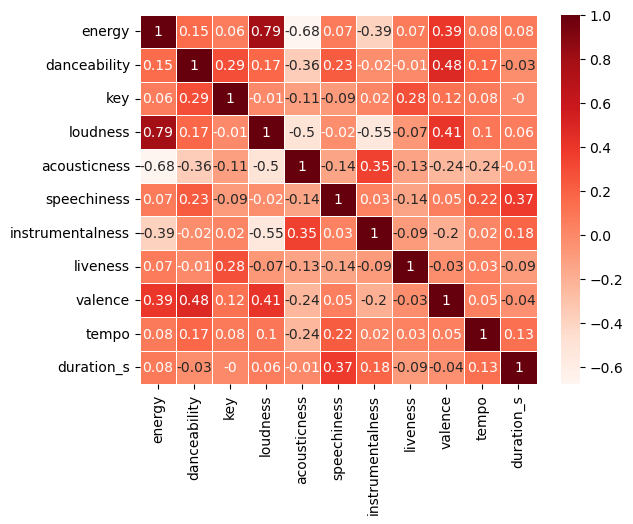

In [96]:
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds, linewidth=.5)
plt.show()

### Which features are strongly positively correlated?

* the best positively correlated are Loudness and Energy (0.791640)

### Which features are strongly negatively correlated?

* Features that are strongly negatively corelated: <br> Acousticness and Energy (-0.68);<br> Loudness  and Instrumentalness (-0.55); <br>Acousticness and Loudness (-0.5).

### Which features are not correlated?

* The features correlation values closest to 0:<br>Key and duration.

### How does the danceability score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

Calculate danceability mean for every genre type:<br>
**with danceability mean we see that highest danceability value is in:<br>
*Hip-Hop/Rap genre (0.765538)<br>
*Dance/Electronic (0.755)**

In [97]:
tracks = df[['danceability', 'genre']].groupby('genre').mean()
tracks.T[['Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie']]

genre,Pop,Hip-Hop/Rap,Dance/Electronic,Alternative/Indie
danceability,0.677571,0.765538,0.755,0.66175


### How does the loudness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

Calculate loudness mean for every genre type:<br>
**with loudness mean we see that highest loudness value is in:<br>
*Hip-Hop/Rap genre (-6.917846)<br>
*Pop (-6.460357)**

In [98]:
tracks = df[['loudness', 'genre']].groupby('genre').mean()
tracks.T[['Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie']]

genre,Pop,Hip-Hop/Rap,Dance/Electronic,Alternative/Indie
loudness,-6.460357,-6.917846,-5.338,-5.421


### How does the acousticness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

Calculate acousticness mean for every genre type:<br>
**with acousticness mean we see that highest acousticness value is in:<br>
*Alternative/Indie genre (0.5835)<br>
*Pop (0.323843)**

In [99]:
tracks = df[['acousticness', 'genre']].groupby('genre').mean()
tracks.T[['Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie']]

genre,Pop,Hip-Hop/Rap,Dance/Electronic,Alternative/Indie
acousticness,0.323843,0.188741,0.09944,0.5835


#### Conclusions:

Our analysis requested to find the best recepie for artis to create the most popular track and to mark what criterias it needs.<br>
My findings are:<br>
* most popular genre is Pop from 16 genres in total with 14 tracks in dataset;
* most danceable genre with highest danceability score is Hip-Hop/Rap
* the loudest genre is  Hip-Hop/Rap and this feature correlates with song energy.


### Improvements:

In [ ]:
* A broader data base is needed for a more informative and interesting analysis, as even small deviations do not really affect the analysis.<br>
* Better visualisation skills are requered. With more skillfull aproach this analysis would really be more visually attractive.
* A better tool understanding would improve the code itself and allows to rise the code quality as well.